## COGS 108 Final Project

## Overview

This study was conducted in order to examine if wealth also affects our access to basic public amenities such as parks. My project analyzes the relationship between the quality of parks in San Diego County and their distance from the three richest towns in the county, Del Mar, Rancho Santa Fe, and La Jolla. More specifically I wanted to see if as you travel further from the wealthiest people in San Diego, would poorer communites be subject to poorly maintained and less safe parks. After analyzing the proportion of well rated parks to poorly rated parks and their distances from these three towns, no relationship was found between the two.

## Name and Github ID

Name: Nima Yazdani <br>
GitHub Username: nimayyazdani

## Research Question

How do the online ratings of parks change in relation to the park's location in San Diego County? Specifically, does the distance from the wealthiest neighborhoods have a substancial affect on these ratings?

## Background and Prior Work

It is well known that the United States has some of the highest wealth inequality in the world, with the top 10 percent of the wealthiest people owning almost 70 percent of the entire countries net worth, while the bottom 50 percent hold only 2 percent of the countries wealth as stated by Statista's article on wealth distribution. This awful truth even exists right here in San Diego County.

According to the San Diego Union Tribune, the wealth gap in San Diego County was recorded as the ninth highest out of 100 surveyed counties in the Unitd Sates, from 2011 to 2016, and that gap is increasing every year. Overall increase in the cost of living, particularly in housing prices, is the main cause of this increase. This widening wealth gap has shown to cause an increases in crime, chronic disease, and stress levels for citizens of these neighborhoods. Parks are proven to increase the quality of living for those who live near them by providing a space to exercise, and socialize, which both imporve heath and have shown to deter criminals. The article, "The Gray-Green Urban Divide: How Wealth and Poverty are Visible from Space", speaks to the fact that surrounding vegetation has a suprising affect on other variables such as crime rates and mental health.

The idea that lower quality parks may be correlated to income levels of a neighborhood have been explored before and written about in publications like, "Neighborhood Income Matters: Disparities in Community Recreation Facilities, Amenities, and Programs". Nation wide studies have been conducted and show, "parks in lower-income neighborhoods may have a greater population density, be less well maintained, have poorer facilities, and offer fewer services than those in higher-income neighborhoods" which can be traced back to generally lower levels of funding for public park and recreation spaces in poorer areas. It seems that access to good parks is a luxury in America. According to the article,"The Gray-Green Urban Divide: How Wealth and Poverty are Visible from Space", wealthier citizens have the leg up because they can utilize larger budgets to meet their greater desire for urban forests, while poorer communities having less demand for vegetation and smaller budgets and therefore having poorly maintained public green space.

My study looks at if the physical distance from the richest neighborhoods in San Diego affect the quality of these green spaces. By comparing the ratings of parks on yelp to the distance from the top three wealthiest neighborhoods, we can see if the wider national trend is prevelant right here in San Diego. ("Wealthiest" is determined by the average adjusted gross income)<br><br>


References(inlcuding links): <br>
1) National Center for Biotechnology Information - Title:"Neighborhood Income Matters: Disparities in Community Recreation Facilities, Amenities, and Programs" - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4082954/<br>

2) San Diego Union Tribune - Title: "Wealth Gap Grows In San Diego, Report Says" - https://www.sandiegouniontribune.com/business/economy/sd-fi-wage-gap-20180511-story.html<br>

3) Geography Realm - Title: "The Gray-Green Urban Divide: How Wealth and Poverty are Visible from Space" - https://www.geographyrealm.com/gray-green-urban-divide-wealth-poverty-visible-space/ <br>

4) Statista - Title: "The Top 10 Percent Own 70 Percent of U.S. Wealth" - https://www.statista.com/chart/19635/wealth-distribution-percentiles-in-the-us/#:~:text=As%20of%20June%202019%2C%20the,another%20half%20at%2037%20percent.


## Hypothesis

I hypothesize that in San Diego, the further a park is from the wealthiest neighborhoods, the lower its ratings will be on Yelp. This is because with lower economic standings, less wealthy zip codes with smaller budgets will have less money to properly maintain parks, while richer citizens demand better surrounding parks that are kept clean with larger budgets.

## Dataset(s)

This data can be used together in order to plot the distance and rating of each park reviewed on Yelp and identify whether or not there is a trend in the graph.<br> <br>


Source 1: US Internal Revenue Service<br>
Name: Map of Wealthiest Zipcodes in Metro San Diego Based on Average Adjusted Gross Income<br> Df stored in a df defined below.
Number of Observations: 16<br>
Description: This data set provides crititical data about the average gross domestic income of citizens and ther respective zip codes.<br>

Source 2: Yelp<br>
Name: Yelp_SD_Parks<br>
Number of Observations: 833<br>
Description: This data set provided information on the longitude and latitude of each park, the average yelp rating of that park, and its address.

Source 3: Google Maps <br>
Name: MAPAWI <br>
Number of Observations: 3 <br>
Description: This source privided the data for the longitude and latitude of Del Mar, Rancho Santa Fe, and La Jolla.


## Setup

Import Useful Tools:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import requests
from bs4 import BeautifulSoup
from scipy.stats import chisquare

Set Common Plotting Size:

In [2]:
plt.rcParams['figure.figsize'] = (17, 7)

## Data Cleaning

Import the Yelp reviews data, drop all columns that are unnecessary, and convert all park names to 'Park' for simplicity. Then create a new dataframe with the names of our three wealthy towns and their coordinates in order to merge this small dataframe with the Yelp reviews.

In [3]:
df_reviews = pd.read_csv('yelp_SD_parks.csv')

In [4]:
df_reviews.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [5]:
df_reviews_updated = df_reviews.drop(columns = ['phone', 'id', 'url', 'review_count', 'is_closed','address'])

In [6]:
df_reviews_updated['name'] = df_reviews_updated['name'].map(lambda x: 'Park')

In [7]:
Rich_Data = pd.DataFrame(columns = ['name','latitude','longitude'],data = [['Del Mar',32.9741,-117.2242],['Rancho Santa Fe',32.9623,-117.0462],['La Jolla',33.0169,-116.846]])


In [8]:
Total_review = pd.concat([Rich_Data, df_reviews_updated],sort =False)
Total_review = Total_review.set_index('name')
Total_review

,latitude,longitude,rating
name,,,
Del Mar,32.974100,-117.224200,NaN
Rancho Santa Fe,32.962300,-117.046200,NaN
La Jolla,33.016900,-116.846000,NaN
Park,32.734502,-117.153150,5.0
Park,32.778315,-117.147278,4.5
...,...,...,...
Park,32.792626,-117.073524,4.5
Park,32.705760,-117.153400,2.5
Park,32.707246,-117.157054,4.0


## Data Analysis and Results

## *Part I*

In order to look at the relationship between distance and Yelp rating, I first needed to use the logitude and latitudes of our wealthy towns, the coordinates of our parks, and the distance formula to create a new colomn for the average distance each park is from each wealthy town.

In [9]:
dist_from_DelMar = ((Total_review.get('latitude') - 32.974100)**2 + (Total_review.get('longitude') - -117.224200)**2)**(1/2)
dist_from_Rancho = ((Total_review.get('latitude') - 32.962300)**2 + (Total_review.get('longitude') - -117.046200)**2)**(1/2)
dist_from_La_Jolla = ((Total_review.get('latitude') - 33.016900)**2 + (Total_review.get('longitude') - -116.846000)**2)**(1/2)

In [10]:
Total_review = Total_review.assign(Dist_from_DelMar = dist_from_DelMar)
Total_review = Total_review.assign(Dist_from_Rancho_Santa_Fe = dist_from_Rancho)
Total_review = Total_review.assign(Dist_from_La_Jolla = dist_from_La_Jolla)
Total_review = Total_review.assign(Avg_Dist_from_Rich_Neighborhood = (1/3)*(dist_from_La_Jolla + dist_from_Rancho + dist_from_DelMar))
Total_review

,latitude,longitude,rating,Dist_from_DelMar,Dist_from_Rancho_Santa_Fe,Dist_from_La_Jolla,Avg_Dist_from_Rich_Neighborhood
name,,,,,,,
Del Mar,32.974100,-117.224200,NaN,0.000000,0.178391,0.380614,0.186335
Rancho Santa Fe,32.962300,-117.046200,NaN,0.178391,0.000000,0.207512,0.128634
La Jolla,33.016900,-116.846000,NaN,0.380614,0.207512,0.000000,0.196042
Park,32.734502,-117.153150,5.0,0.249911,0.251655,0.417241,0.306269
Park,32.778315,-117.147278,4.5,0.210354,0.209922,0.384306,0.268194
...,...,...,...,...,...,...,...
Park,32.792626,-117.073524,4.5,0.235873,0.171860,0.319477,0.242403
Park,32.705760,-117.153400,2.5,0.277523,0.278037,0.437382,0.330981
Park,32.707246,-117.157054,4.0,0.275172,0.278103,0.438908,0.330728


In [11]:
Total_dist_df = Total_review.groupby(['rating']).mean()
Total_dist_df = Total_dist_df.drop(columns = ['latitude','longitude'])
Total_dist_df = Total_dist_df.reset_index()

In [12]:
#Total_dist_df.plot(kind='line',x = 'rating',y = ('Avg_Dist_from_Rich_Neighborhood'))

In order to accurately observe the relationship between park ratings and the average distance from wealthy neighborhoods, I must first certify that there are similar numbers of observations made at each distance in order to create an accurate proportion of well rated parks at each general distance.

Text(0.5, 1.0, 'Number of Parks at Each Distance From Wealthy Towns')

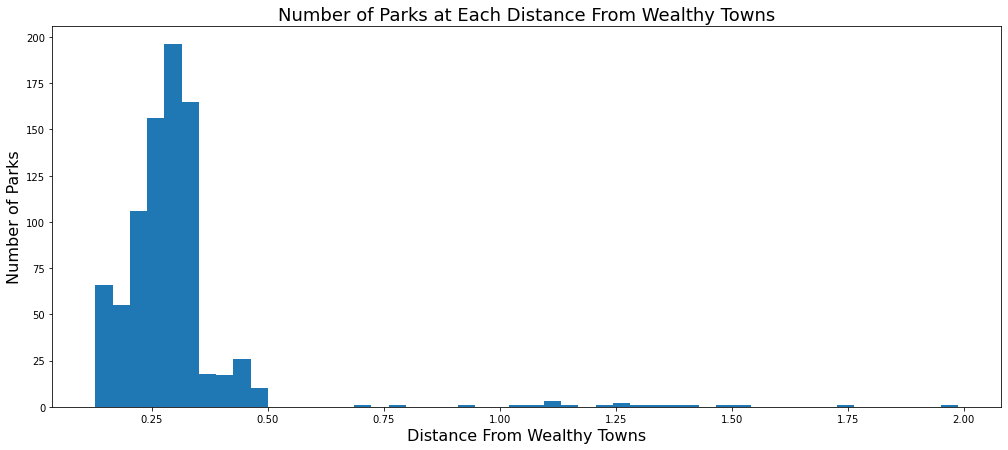

In [13]:
Total_review_hist = Total_review.get('Avg_Dist_from_Rich_Neighborhood').plot(kind = 'hist', bins = 50)
Total_review_hist.set_xlabel('Distance From Wealthy Towns',size = 16)
Total_review_hist.set_ylabel('Number of Parks',size = 16)
Total_review_hist.set_title('Number of Parks at Each Distance From Wealthy Towns',size = 18)

We can see in the scatter histogram above that most of our observations are concentrated at close distances with a small but still significant number of observations scattered towards further distances.

## *Part II*

As can observed above, the majority of parks are centered below .5 units from our wealthy neighborhoods. If this is not taken into account, the line plot of the number of highly rated parks or low rated parks will moslty be a function of the number of observations made at each distance rather than an accurate representation of the change in Yelp ratings as we move further from our wealthy towns. <br> <br>
In the below code the various distances recorded were divided into sections 1-8 in order to more evenly distribute our data and prevent any outlying data to dramatically affect our results. Then we use the number of good parks (rating > or = 3.5) and the number of bad parks (rating < 3.5) in each distance group to find the proportion of good parks and then graph this change in proportions as we get further from our wealthy towns.

In [14]:
Total_review

,latitude,longitude,rating,Dist_from_DelMar,Dist_from_Rancho_Santa_Fe,Dist_from_La_Jolla,Avg_Dist_from_Rich_Neighborhood
name,,,,,,,
Del Mar,32.974100,-117.224200,NaN,0.000000,0.178391,0.380614,0.186335
Rancho Santa Fe,32.962300,-117.046200,NaN,0.178391,0.000000,0.207512,0.128634
La Jolla,33.016900,-116.846000,NaN,0.380614,0.207512,0.000000,0.196042
Park,32.734502,-117.153150,5.0,0.249911,0.251655,0.417241,0.306269
Park,32.778315,-117.147278,4.5,0.210354,0.209922,0.384306,0.268194
...,...,...,...,...,...,...,...
Park,32.792626,-117.073524,4.5,0.235873,0.171860,0.319477,0.242403
Park,32.705760,-117.153400,2.5,0.277523,0.278037,0.437382,0.330981
Park,32.707246,-117.157054,4.0,0.275172,0.278103,0.438908,0.330728


In [15]:
def convert_dist(dist):
        if dist <= .15:
            return 1
        elif dist > .15 and dist <= .2:
            return 2
        elif dist > .2 and dist <= .25:
            return 3
        elif dist > .25 and dist <= .3:
            return 4
        elif dist > .3 and dist <= .35:
            return 5
        elif dist > .35 and dist <= .4:
            return 6
        elif dist > .4 and dist <= .45:
            return 7
        else:
            return 8


The function above organizes the observations at each distance into more evenly distributed distance groups. Group 1 being the closest to our wealthy towns, and group 9 being the furthest away. This is useful to organize our data into groups in order to create a proportion of well rated parks as observe the change in this proportion as distance increases.

In [16]:
def convert_rating_Good(rate):
        if rate >= 3.5:
            return 'Good Park'
        elif rate < 3.5:
            return None
def convert_rating_Bad(rate):
        if rate >= 3.5:
            return None
        elif rate < 3.5:
            return 'Bad Park'

The functions above divide our observations into whether or not a reviewed park is good or bad. Below 3.5 rated parks being assigned as bad parks, and above and including 3.5 rated parks being assigned to good parks. This allows us to divide our Yelp data into easy to read and useful identifiers for good and bad parks.

In [17]:
C_F= Total_review['Avg_Dist_from_Rich_Neighborhood'].apply(convert_dist)
G= Total_review['rating'].apply(convert_rating_Good)
B = Total_review['rating'].apply(convert_rating_Bad)

Total_review_C_F_G = Total_review.assign(Close_or_Far = C_F)
Total_review_C_F_G = Total_review_C_F_G.assign(Good_or_Bad = G)

Total_review_C_F_B = Total_review.assign(Close_or_Far = C_F)
Total_review_C_F_B = Total_review_C_F_B.assign(Good_or_Bad = B)

In [18]:
Total_review_C_F_G = Total_review_C_F_G.reset_index()
Total_review_C_F_G

,name,latitude,longitude,rating,Dist_from_DelMar,Dist_from_Rancho_Santa_Fe,Dist_from_La_Jolla,Avg_Dist_from_Rich_Neighborhood,Close_or_Far,Good_or_Bad
0,Del Mar,32.974100,-117.224200,NaN,0.000000,0.178391,0.380614,0.186335,2,None
1,Rancho Santa Fe,32.962300,-117.046200,NaN,0.178391,0.000000,0.207512,0.128634,1,None
2,La Jolla,33.016900,-116.846000,NaN,0.380614,0.207512,0.000000,0.196042,2,None
3,Park,32.734502,-117.153150,5.0,0.249911,0.251655,0.417241,0.306269,5,Good Park
4,Park,32.778315,-117.147278,4.5,0.210354,0.209922,0.384306,0.268194,4,Good Park
...,...,...,...,...,...,...,...,...,...,...
831,Park,32.792626,-117.073524,4.5,0.235873,0.171860,0.319477,0.242403,3,Good Park
832,Park,32.705760,-117.153400,2.5,0.277523,0.278037,0.437382,0.330981,5,None
833,Park,32.707246,-117.157054,4.0,0.275172,0.278103,0.438908,0.330728,5,Good Park
834,Park,33.171137,-117.316419,3.0,0.217550,0.341513,0.495059,0.351374,6,None


In [19]:
Total_review_C_F_G_grouped = Total_review_C_F_G.groupby(['Close_or_Far','Good_or_Bad']).count()
Good_Parks_grouped_G = Total_review_C_F_G_grouped.drop(columns = ['latitude','longitude','rating','Dist_from_DelMar','Dist_from_Rancho_Santa_Fe','Dist_from_La_Jolla','Avg_Dist_from_Rich_Neighborhood'])
Good_Parks_grouped_G = Good_Parks_grouped_G.reset_index()
Good_Parks_grouped_G = Good_Parks_grouped_G.assign(Num_Good_Parks = Good_Parks_grouped_G.get('name'))
Good_Parks_grouped_G = Good_Parks_grouped_G.assign(total = Good_Parks_grouped_G.get('name'))
#Good_Parks_grouped_G = Good_Parks_grouped_G.drop(columns = 'name')
Good_Parks_grouped_G

,Close_or_Far,Good_or_Bad,name,Num_Good_Parks,total
0,1,Good Park,19,19,19
1,2,Good Park,78,78,78
2,3,Good Park,140,140,140
3,4,Good Park,189,189,189
4,5,Good Park,218,218,218
5,6,Good Park,28,28,28
6,7,Good Park,19,19,19
7,8,Good Park,32,32,32


Text(0.5, 1.0, 'Number of Good Parks at Each Distance from Wealthy Towns')

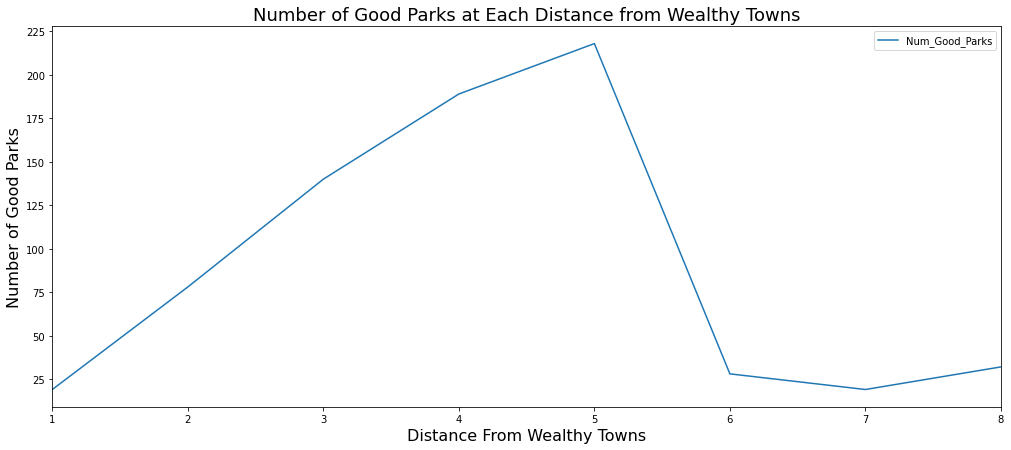

In [20]:
Good_Parks_grouped_G_plot = Good_Parks_grouped_G.plot(kind = 'line',x = 'Close_or_Far', y = 'Num_Good_Parks')
Good_Parks_grouped_G_plot.set_xlabel('Distance From Wealthy Towns',size = 16)
Good_Parks_grouped_G_plot.set_ylabel('Number of Good Parks',size = 16)
Good_Parks_grouped_G_plot.set_title('Number of Good Parks at Each Distance from Wealthy Towns',size = 18)

The above graph demostrates how the number of good parks is mainly a function of the number of observations in each distance group, making it not useful for answering our question.

In [21]:
Total_review_C_F_B

,latitude,longitude,rating,Dist_from_DelMar,Dist_from_Rancho_Santa_Fe,Dist_from_La_Jolla,Avg_Dist_from_Rich_Neighborhood,Close_or_Far,Good_or_Bad
name,,,,,,,,,
Del Mar,32.974100,-117.224200,NaN,0.000000,0.178391,0.380614,0.186335,2,None
Rancho Santa Fe,32.962300,-117.046200,NaN,0.178391,0.000000,0.207512,0.128634,1,None
La Jolla,33.016900,-116.846000,NaN,0.380614,0.207512,0.000000,0.196042,2,None
Park,32.734502,-117.153150,5.0,0.249911,0.251655,0.417241,0.306269,5,None
Park,32.778315,-117.147278,4.5,0.210354,0.209922,0.384306,0.268194,4,None
...,...,...,...,...,...,...,...,...,...
Park,32.792626,-117.073524,4.5,0.235873,0.171860,0.319477,0.242403,3,None
Park,32.705760,-117.153400,2.5,0.277523,0.278037,0.437382,0.330981,5,Bad Park
Park,32.707246,-117.157054,4.0,0.275172,0.278103,0.438908,0.330728,5,None


In [22]:
Total_review_C_F_B = Total_review_C_F_B.reset_index('name')

In [23]:
Total_review_C_F_B_grouped = Total_review_C_F_B.groupby(['Close_or_Far','Good_or_Bad']).count()
Good_Parks_grouped_B = Total_review_C_F_B_grouped.drop(columns = ['latitude','longitude','rating','Dist_from_DelMar','Dist_from_Rancho_Santa_Fe','Dist_from_La_Jolla','Avg_Dist_from_Rich_Neighborhood'])
Good_Parks_grouped_B = Good_Parks_grouped_B.reset_index()
Good_Parks_grouped_B = Good_Parks_grouped_B.assign(Num_Bad_Parks = Good_Parks_grouped_B.get('name'))
Good_Parks_grouped_B = Good_Parks_grouped_B.assign(total = Good_Parks_grouped_B.get('name'))
Good_Parks_grouped_B = Good_Parks_grouped_B.drop(columns = 'name')
Good_Parks_grouped_B

,Close_or_Far,Good_or_Bad,Num_Bad_Parks,total
0,1,Bad Park,4,4
1,2,Bad Park,7,7
2,3,Bad Park,17,17
3,4,Bad Park,36,36
4,5,Bad Park,28,28
5,6,Bad Park,7,7
6,7,Bad Park,6,6
7,8,Bad Park,5,5


Text(0.5, 1.0, 'Number of Bad Parks at Each Distance from Wealthy Towns')

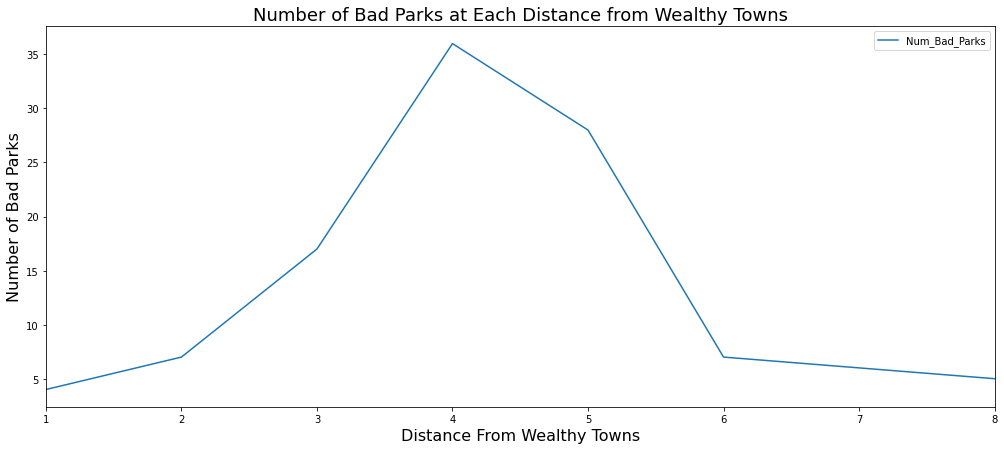

In [24]:
Good_Parks_grouped_B_plot = Good_Parks_grouped_B.plot(kind = 'line',x = 'Close_or_Far', y = 'Num_Bad_Parks')
Good_Parks_grouped_B_plot.set_xlabel('Distance From Wealthy Towns',size = 16)
Good_Parks_grouped_B_plot.set_ylabel('Number of Bad Parks',size = 16)
Good_Parks_grouped_B_plot.set_title('Number of Bad Parks at Each Distance from Wealthy Towns',size = 18)

The above graph demostrates how the number of bad parks is mainly a function of the number of observations in each distance group, making it not useful for answering our question. <br> <br>
A much better way to utilize this data would be to get a proportion of well rated parks to poorly rated parks and comapre the change in this proportion as we get further from our wealthy towns.

In [25]:
Good_Parks_grouped_Both = pd.concat([Good_Parks_grouped_B, Good_Parks_grouped_G],sort =False)
Good_Parks_grouped_Both = Good_Parks_grouped_Both.groupby(['Close_or_Far']).sum()
Good_Parks_grouped_Both = Good_Parks_grouped_Both.assign(Prop_of_Good_Parks = Good_Parks_grouped_Both.get('Num_Good_Parks') / Good_Parks_grouped_Both.get('total'))
Good_Parks_grouped_Both = Good_Parks_grouped_Both.reset_index()
Good_Parks_grouped_Both = Good_Parks_grouped_Both.drop(columns = 'name')
Good_Parks_grouped_Both

,Close_or_Far,Num_Bad_Parks,total,Num_Good_Parks,Prop_of_Good_Parks
0,1,4.0,23,19.0,0.826087
1,2,7.0,85,78.0,0.917647
2,3,17.0,157,140.0,0.891720
3,4,36.0,225,189.0,0.840000
4,5,28.0,246,218.0,0.886179
5,6,7.0,35,28.0,0.800000
6,7,6.0,25,19.0,0.760000
7,8,5.0,37,32.0,0.864865


Text(0.5, 1.0, 'Proportion of Good Parks at Each Distance from Wealthy Towns')

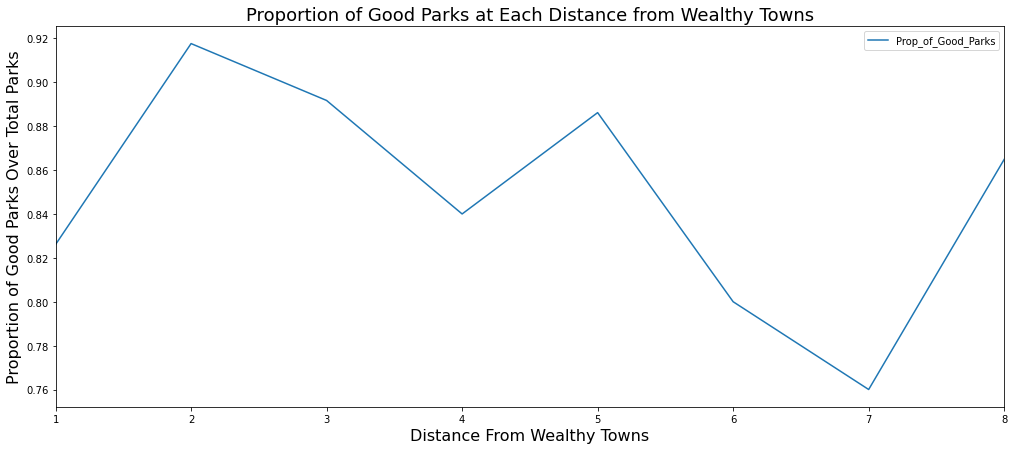

In [26]:
Good_Parks_grouped_Both_plot = Good_Parks_grouped_Both.plot(kind = 'line',x = 'Close_or_Far', y = 'Prop_of_Good_Parks')
Good_Parks_grouped_Both_plot.set_xlabel('Distance From Wealthy Towns',size = 16)
Good_Parks_grouped_Both_plot.set_ylabel('Proportion of Good Parks Over Total Parks',size = 16)
Good_Parks_grouped_Both_plot.set_title('Proportion of Good Parks at Each Distance from Wealthy Towns',size = 18)


This final graph uses the proportions of good parks in each distance group in order to demonstrate the change in the proportion of good parks as we get further from our wealthy towns.

## Ethics and Privacy

As none of the data that was used was personal or private as it is public information, this helps keep this project ethical and private. But the lack of correlation between the distance from the wealthiest neighborhoods and the ratings of parks can be used in unethical ways, while the data sets used probably contained some sort of bias. <br> <br>
First off, the results of this study show that there is not a significant gap between the quality of parks in poorer areas compared to the richest areas. This conclusion could easily be used to argue that poorer communities have good enough living standards and are treated fairly when it comes to systematic funding and polciy decisions made on a city or state level. This study should not be used to make an overarching claim about the equity between citizens with differing levels of income. Instead this study can only show that the distance from Del Mar, Rancho Santa Fe, and La Jolla do not have a significant affect on Yelp ratings. The acknowledgement of the difference between Yelp reviews and the actual opinions of citizens and those who utilize parks in San Diego is also critiical in making sure this study is not used to generalize the thoughts of those who did not leave a review on Yelp. <br><br>
Secondly, the method we used to evaluate how good each park is was through Yelp. Yelp has a particular demographic most definitely differs from the general public in San Diego County. Yelp is an online service which means that its users are probably younger than the average person and the fact that to give a rating of a park you need a smartphone and manually review a park means that park reviews may not be exaclty representative of the opinions of citizens. For example, somone may think a park is poorly maintained but the barier to writing a review of the park is just great enough that they do not bother leaving a review. These disparities between our data and the actual thoughts of citizens about parks cause a bias in our data.<br><br>




## Conclusion and Discussion

In my project I wanted to examine if the location of a park, whether it is closer or further from the wealthiest neighborhoods in San Diego, affect the quality of the park. The wealthiest neighborhoods were determined to be the ones with the greatest average adjusted gross income of the citizens who live there, and the quality of parks were evaluated using Yelp reviews. The data I used included the reviews of parks in San Diego County rated 1-5 stars, the logitude and latitude of these parks in question, the wealthiest neighborhoods in San Deigo County, and the approximate logitude and latitude of these neighborhoods. I hypothesized, that through the analysis of this data, there would be a correlation that demostrated that the ratings of parks would decrease as we got further from the three wealthiest neighborhoods. From my background research I suspected that the national tendancy of poorer neighborhoods conatining worse green spaces, could be observed when looking at parks and their distances from the three wealthiest towns in San Diego. <br> <br>
In order to conduct this analysis, after cleaning the data, I used the coordinates of each park and the three towns in our data to create a line plot showing how the proportion of highly rated parks changed as we distanced from the towns. In order to get an accurate proportion I divied our data into distance groups 1-8 in order to place less weight on ratings at distances where there were few observations to observe. When plotting this change in proportions over distance I concluded that there is no significant coorelation between the quality of parks rated on Yelp, and their distance from the wealthiest neighborhoods in San Diego. This study was conducted with limited and bias data, meaning that there are significant limitations to this project. <br> <br>
Because our data only included the top three wealthiest communities in San Diego, this study cannot make an overall claim that the quality of all parks in San Diego are even no matter their location. This is because when using more data about the average gross income of citizens in every zip code there may be a clearer coorelation between wealth and park ratings. This study also does not take into account the number of parks in each neighborhood and the relation this has to wealth or the demographic of Yelp reviews that most likely does not represent the broader public. <br> <br>
Despite these limitations, I chose to answer this question because it was about something that I am particularly pationate about, social inequality. Social inequality has been prevelant in the United States since its founding and though we are continuously working to combat it, there is plenty of work still needed to be done. This starts with asking the right questions in order to lead us towards the correct answers. I think this project is a very small step into identifying where our society lacks in its treatment of marginalized communities, but a step nonetheless. Wealth, race, gender, religion, language, and many more variable contribute to inequality around the world so I believe it is everyone's duty to help fight for this cause.